## Import event log

In [1]:
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
domestic_path = 'data/DomesticDeclarations.xes'
international_path = 'data/InternationalDeclarations.xes'

log= pm4py.read_xes(domestic_path);

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

## Statistical Analysis of Event Data

In [3]:
# log

In [4]:
cases = log['case:id'].unique()
len(cases)

10500

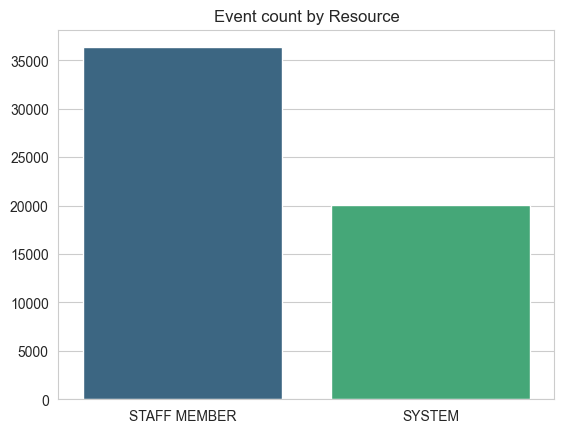

In [5]:
resources = log['org:resource'].unique()
sns.countplot(x='org:resource', data=log, palette='viridis').set(title='Event count by Resource', xlabel='', ylabel='');

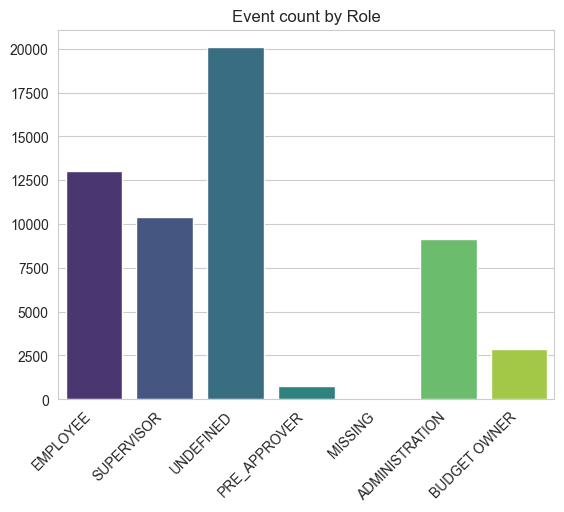

In [6]:
roles = log['org:role'].unique()
sns.countplot(x='org:role', data=log, palette='viridis').set(title='Event count by Role', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

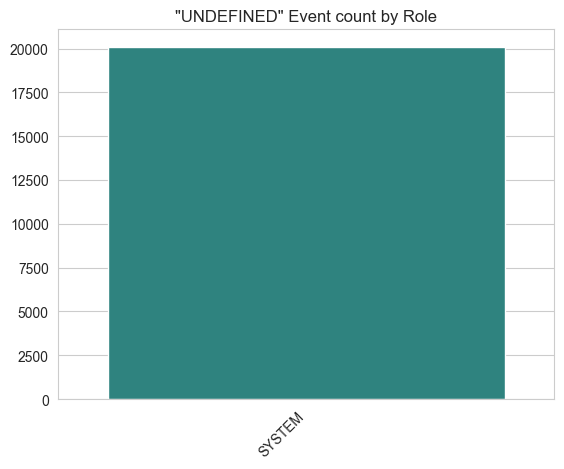

In [7]:
log_i = log[log['org:role'] == 'UNDEFINED']
sns.countplot(x='org:resource', data=log_i, palette='viridis').set(title='"UNDEFINED" Event count by Role', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

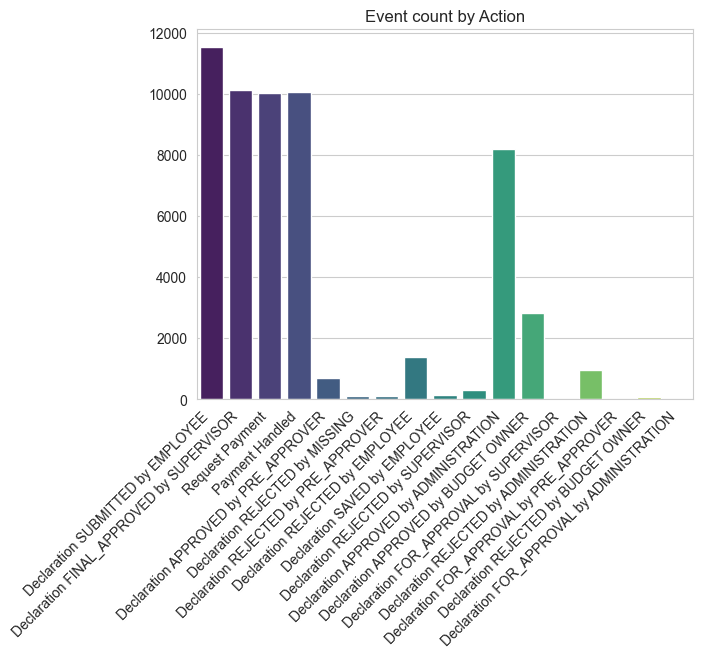

In [8]:
actions = log['concept:name'].unique()
sns.countplot(x='concept:name', data=log, palette='viridis').set(title='Event count by Action', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

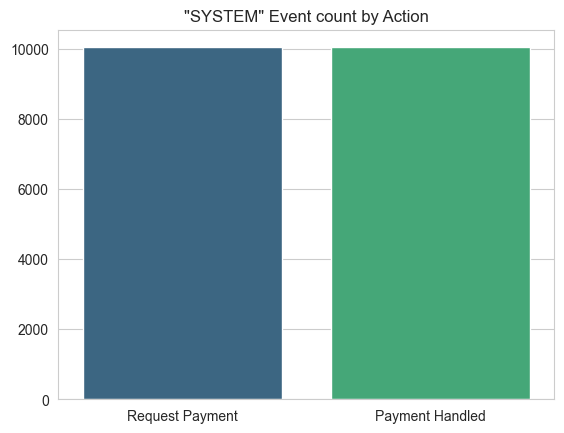

In [9]:
# System Events
log_s = log[log['org:resource'] == 'SYSTEM']
sns.countplot(x='concept:name', data=log_s, palette='viridis').set(title='"SYSTEM" Event count by Action', xlabel='', ylabel='');

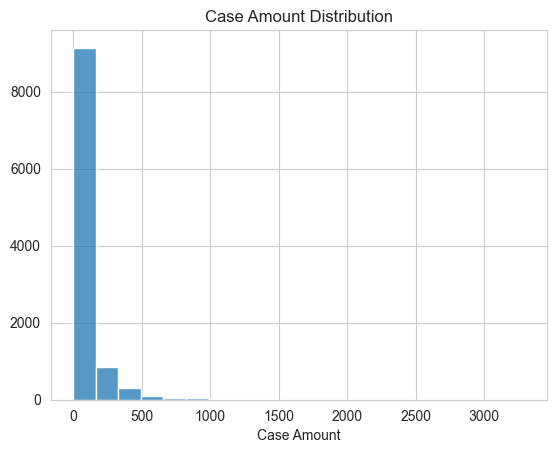

In [10]:
# case amount distribution for distinct case:id
distinct_case_amounts = log.groupby('case:id')['case:Amount'].max()
sns.histplot(distinct_case_amounts, kde=False, bins=20).set(title='Case Amount Distribution', xlabel='Case Amount', ylabel='');

## Process Discovery

In [11]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

tree = inductive_miner.apply(log)

## Visualize Process Model

Having mined the model we may vizualize it as a Process Tree or Petri Net.

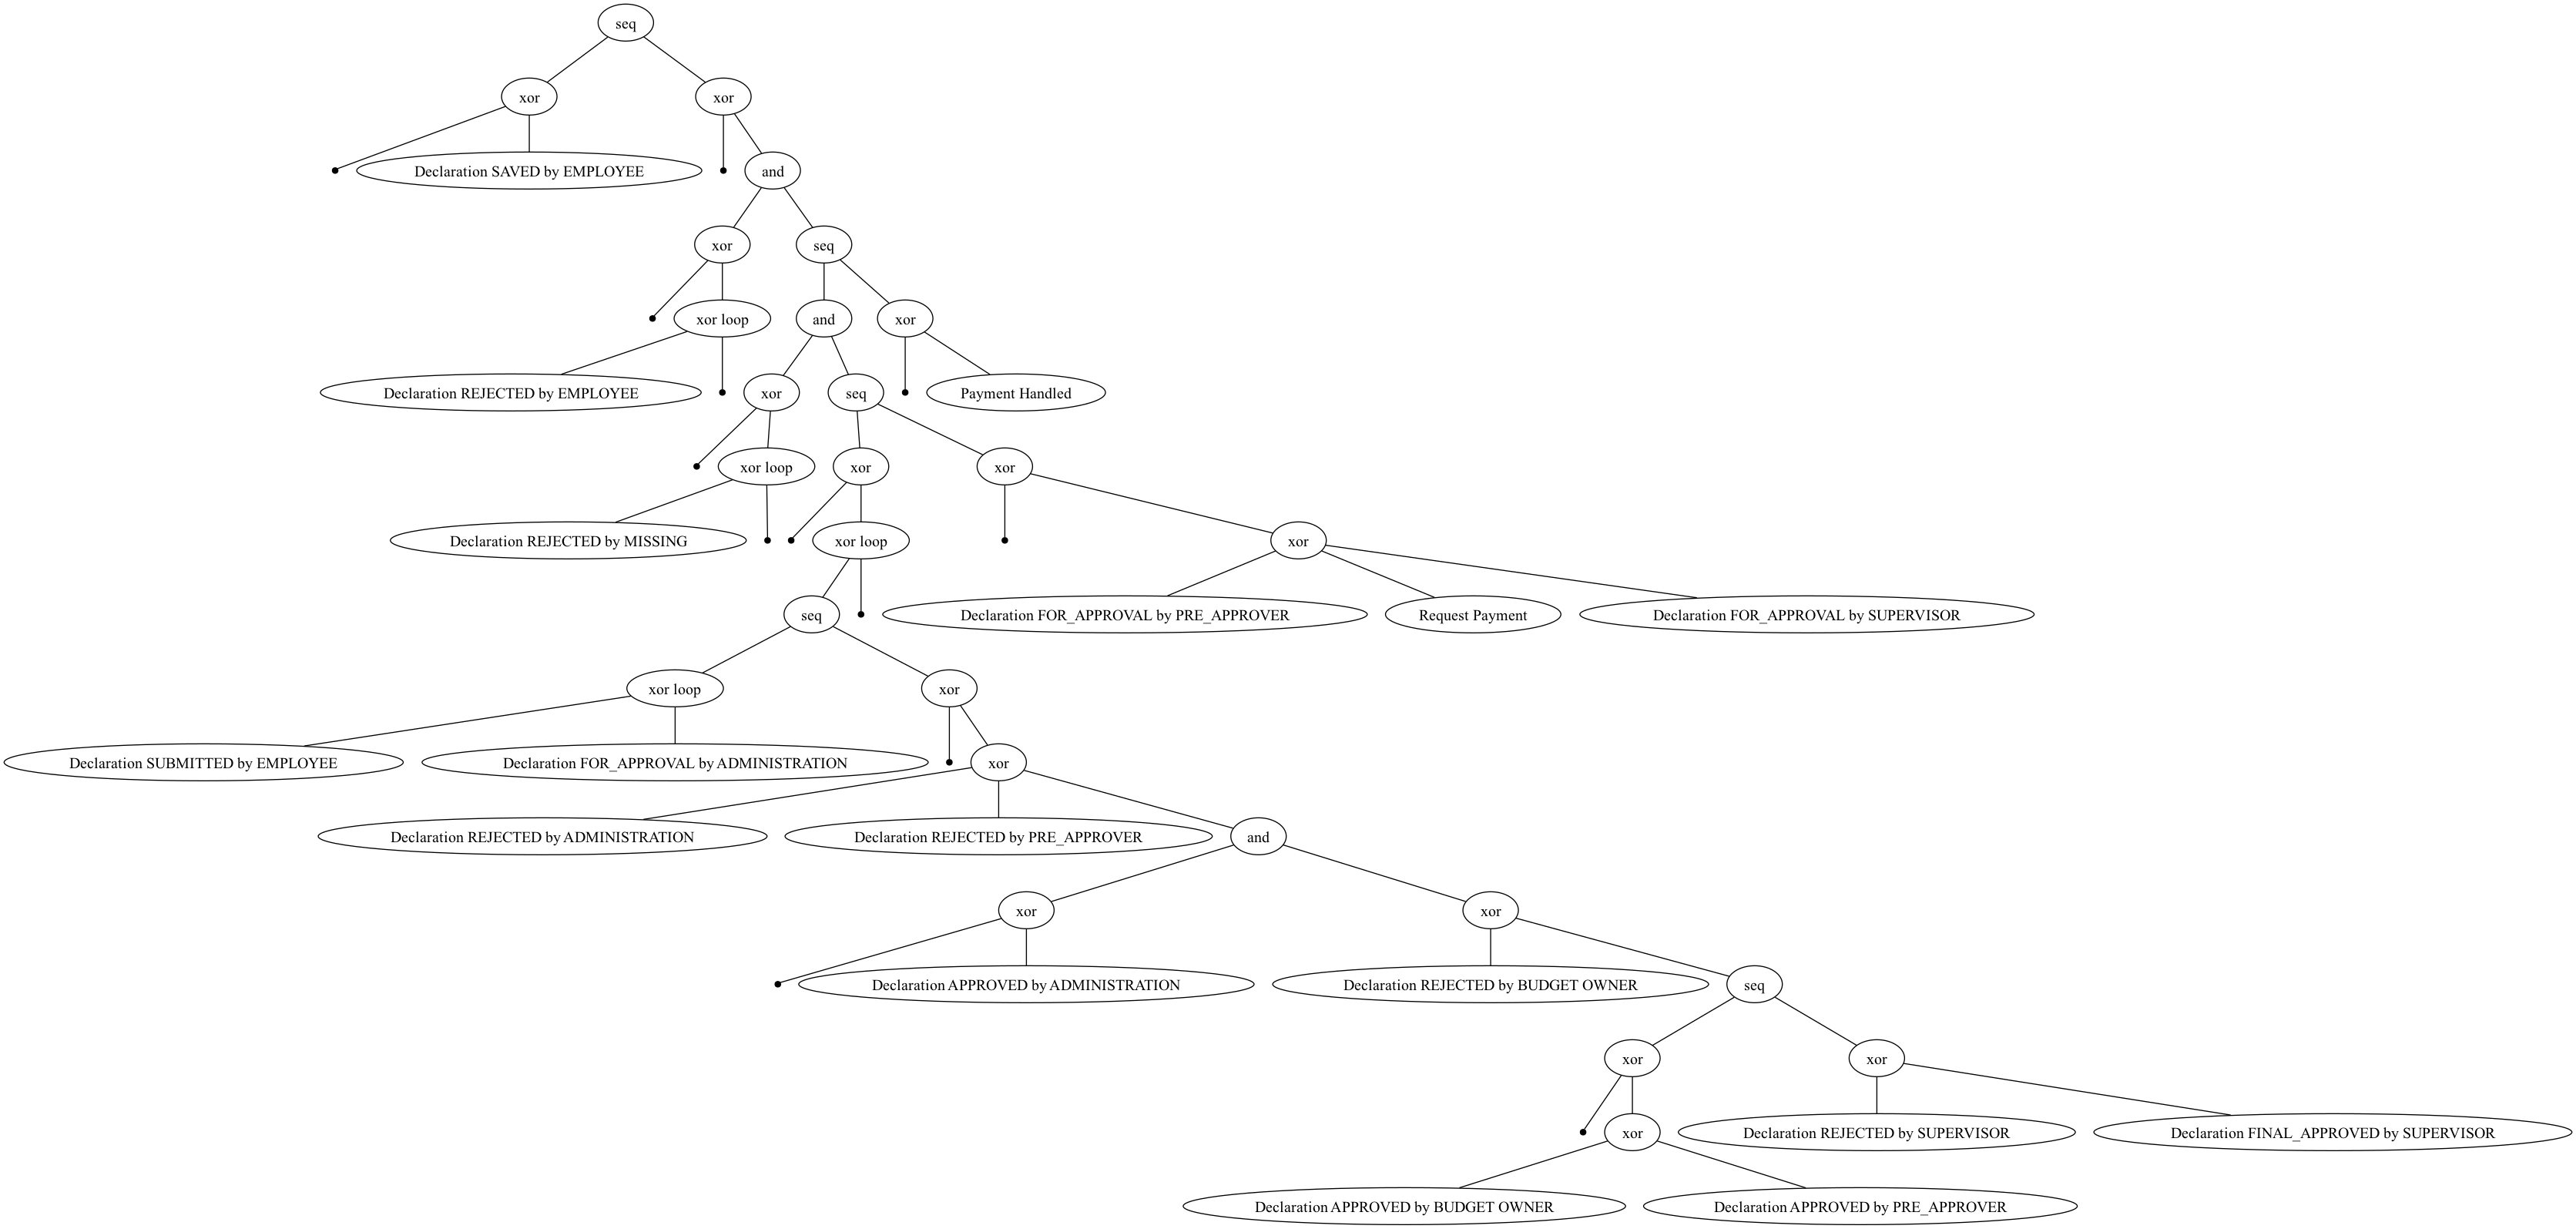

In [12]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer

# Visualize the process trees
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

## Derive Petri Net using inductive mining algorithm

In [13]:
from pm4py import convert_to_petri_net as pt_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Convert the process trees into petri nets
net1, initial_marking1, final_marking1 = pt_converter(tree1)
net2, initial_marking2, final_marking2 = pt_converter(tree2)

# Visualize the petri nets
gviz_pn1 = pn_visualizer.apply(net1, initial_marking1, final_marking1)
pn_visualizer.view(gviz_pn1)

gviz_pn2 = pn_visualizer.apply(net2, initial_marking2, final_marking2)
pn_visualizer.view(gviz_pn2)

NameError: name 'tree1' is not defined

## Performance Measures


In [ ]:
from pm4py.statistics.traces import cycle_time
from pm4py.statistics import variants
from pm4py.statistics.start_activities.log import get as start_activities
from pm4py.statistics.end_activities.log import get as end_activities

# Tasks frequency
start_activities_count1 = start_activities.get_start_activities(log_i)
end_activities_count1 = end_activities.get_end_activities(log_i)

start_activities_count2 = start_activities.get_start_activities(log_d)
end_activities_count2 = end_activities.get_end_activities(log_d)

# Case variants

# Inter-case time

In [ ]:
end_activities_count1

In [ ]:
log

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log, case_id_key='case:id', activity_key='case:concept:name', timestamp_key='time:timestamp')